<a href="https://colab.research.google.com/github/Sudaiii/ML-Experiments/blob/main/Tarea_ML_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

Librerias:

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

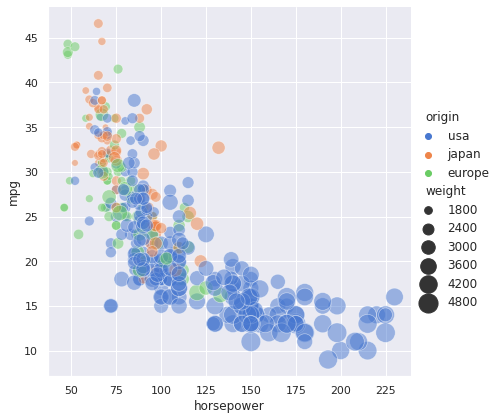

In [74]:
mpg = sns.load_dataset("mpg")
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

# 2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

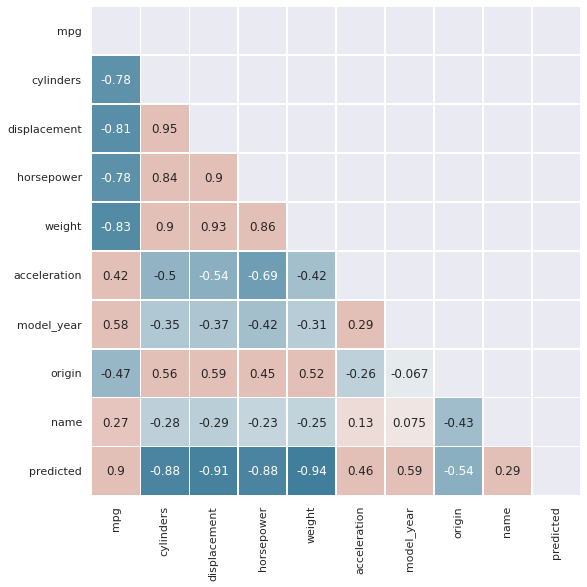

In [91]:
corr = mpg.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, cbar=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, )


# 3) (1 punto) Construir y entrenar un modelo de regresion lineal
 

Pre-procesamiento

In [76]:
# Se limpian las tuplas de valores nulos
mpg.dropna(axis=0, how='any', inplace=True)

# Se convierten el texto a valores númericos
label_enconder = LabelEncoder()
mpg["origin"] = label_enconder.fit_transform(mpg["origin"])
mpg["name"] = label_enconder.fit_transform(mpg["name"])

mpg[["origin", "name"]][:]

,origin,name
0,2,48
1,2,35
2,2,229
3,2,13
4,2,159
...,...,...
393,2,151
394,0,297
395,2,118
396,2,157


Se seleccionan las columnas a utilizar. Se desea predecir el rendimiento (el mpg) asi que eso sera el y, las demas columnas seran y

In [77]:
x = mpg.iloc[:, 1:]
y = mpg.iloc[:, 0]

Se entrena el modelo

In [78]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)

# Se hace la predicción y se almacena en la columna "predicted"
mpg["predicted"] = model.predict(x)

# 4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

Para esta pregunta, se evaluaran tres metricas:

1) Error cuadrático promedio

2) Raíz del error cuadrático medio

3) Error absoluto medio

4) R Squared


Error cuadrático promedio

In [79]:
mse = mean_squared_error(mpg["mpg"], mpg["predicted"])
mse

11.269812992515098

Raíz del error cuadrático medio

In [80]:
math.sqrt(mse)

3.357054213520404

In [81]:
mae = mean_absolute_error(mpg["mpg"], mpg["predicted"])
mae

2.5827792692716596

In [82]:
r2 = r2_score(mpg["mpg"], mpg["predicted"])
r2

0.8145275660475055

# 5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. Esta informacion la obtiene del correlation plot. Realizar un grafico de dispersion con las variables mas correlacionadas.

Del gráfico de correlación, se observa que las variables con mayor correlación positiva son "displacement" y "cylinders"

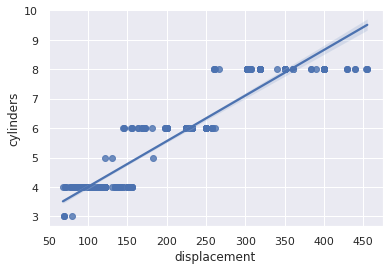

In [93]:
sns.regplot(x="displacement", y="cylinders", data=mpg)


# 6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.